# <center>Investigating TMDb Dataset</center>
## Table of Contents
- [Introduction](#introduction)
- [Data Wrangling](#wrangling)
  - [Inspection](#inspection)
  - [Cleaning](#cleaning)
- [Exploratory Data Analysis](#eda)

<a id='introduction'></a>
## Introduction

In [22]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stylist as sty

In [23]:
# -> Change to 'c = 0' and re-run all cells before exporting
c = 0

# -> Leave as-is
sns.set_style(style='darkgrid', rc=sty.sns_params(c))
plt.rcParams.update(sty.plt_params(c))
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

<a id='inspection'></a>
### Inspection

In [24]:
# Loading the dataset
df = pd.read_csv('tmdb-movies.csv')

# Number of rows x Number of columns
print(f'{df.shape[0]} x {df.shape[1]}')

10866 x 21


In [25]:
# Printing out the first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [26]:
# Checking datatypes and instances of missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [27]:
# Generating a summary of descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='cleaning'></a>
### Cleaning

In [28]:
# Dropping rows of duplicated movies
df.drop_duplicates('id', inplace=True)
df.drop_duplicates('imdb_id', inplace=True)
df.drop_duplicates('original_title', inplace=True)

In [29]:
# Dropping columns of unnecessary data
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'tagline', 'keywords', 'overview', 'release_date'], axis=1, inplace=True)

# Dropping rows with missing values
df.dropna(subset=['cast', 'director', 'genres', 'production_companies'], inplace=True)

In [30]:
# Modifying the 'homepage' column so that it only has two possibilities and then renaming it to 'has_a_webpage'
for index, value in df['homepage'].items():
    if pd.isna(value):
        df['homepage'].at[index] = 'No'
    else:
        df['homepage'].at[index] = 'Yes'

# Renaming columns into more descriptive names        
df.rename(columns={'homepage': 'has_a_webpage', 'budget_adj': 'budget', 'revenue_adj': 'revenue'}, inplace=True)

In [31]:
# Converting values of the 'genres' column into sorted tuples
df['genres'] = df['genres'].str.split('|')
for index, value in df['genres'].items():
    df['genres'].at[index] = tuple(sorted(value))


In [32]:
# Converting values of the 'budget' and 'revenue' columns into integers
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)

> Let's take a final look at our data before proposing any questions.

In [33]:
df.head()

,popularity,original_title,cast,has_a_webpage,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Yes,Colin Trevorrow,124,"(Action, Adventure, Science Fiction, Thriller)",Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Yes,George Miller,120,"(Action, Adventure, Science Fiction, Thriller)",Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Yes,Robert Schwentke,119,"(Adventure, Science Fiction, Thriller)",Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Yes,J.J. Abrams,136,"(Action, Adventure, Fantasy, Science Fiction)",Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183999919,1902723129
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Yes,James Wan,137,"(Action, Crime, Thriller)",Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174799923,1385748801


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9488 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9488 non-null   float64
 1   original_title        9488 non-null   object 
 2   cast                  9488 non-null   object 
 3   has_a_webpage         9488 non-null   object 
 4   director              9488 non-null   object 
 5   runtime               9488 non-null   int64  
 6   genres                9488 non-null   object 
 7   production_companies  9488 non-null   object 
 8   vote_count            9488 non-null   int64  
 9   vote_average          9488 non-null   float64
 10  release_year          9488 non-null   int64  
 11  budget                9488 non-null   int32  
 12  revenue               9488 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(6)
memory usage: 1.2+ MB


In [35]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,9488.000000,9488.000000,9488.000000,9488.000000,9488.000000,9.488000e+03,9.488000e+03
mean,0.697357,102.698567,241.411256,5.956598,2001.217011,1.952944e+07,5.495927e+07
std,1.045416,26.483380,607.914152,0.915891,12.818442,3.584752e+07,1.492563e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,-2.147484e+09
25%,0.232403,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.420687,100.000000,46.000000,6.000000,2005.000000,3.394520e+05,0.000000e+00
75%,0.778638,112.000000,176.000000,6.600000,2011.000000,2.494601e+07,4.257348e+07
max,32.985763,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,1.907006e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1
Are movies with webpages more popular among the viewers?

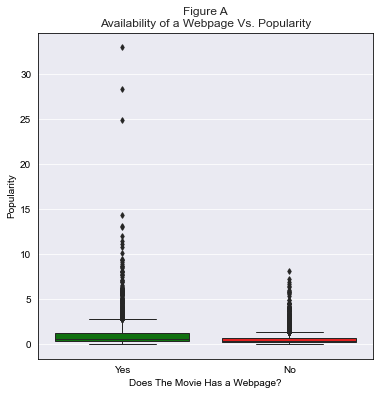

In [36]:
# Graphing a boxplot of movies popularity
plt.figure(figsize=(6,6))
bp = sns.boxplot(x='has_a_webpage', y='popularity', data=df, palette={'Yes': 'g', 'No': 'r'}, fliersize=4, linewidth=1)
bp.set_title('Figure A\nAvailability of a Webpage Vs. Popularity')
bp.set_xlabel('Does The Movie Has a Webpage?', fontsize=10)
bp.set_ylabel('Popularity', fontsize=10);

> These two variables were chosen because they're a key determinant to answer my question, but the choice of graph type came out of my need to compare distributions of tendencies, spread and range.
> 
> **Box plots** are graphed to help us visualize the five-number statistical summary (minimum value, lower quartile [$Q_1$], median [$Q_2$], upper quartile [$Q_3$] and maximum value).
> 
> Taking a quick look at the graph clearly show how movies with webpages are realtively **more** popular.

## Question 2
Does movie budgets affect their votings? 

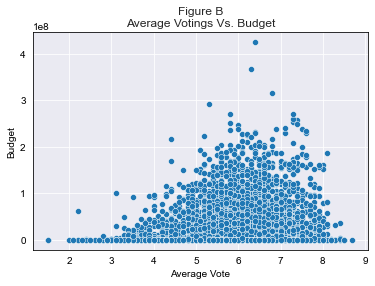

In [37]:
# Graphing a scatterplot between each movie's average votings and its budget
sp = sns.scatterplot(x='vote_average', y='budget', data=df)
sp.set_title('Figure B\nAverage Votings Vs. Budget')
sp.set_xlabel('Average Vote', fontsize=10)
sp.set_ylabel('Budget', fontsize=10);

> Using adjusted values of budgets and average ratings of viewers, a **scatter plot** was graphed to determine whether a higher movie budget gaurentees higher ratings.
> 
> Scatter plots are not only used to observe and show a relationship between two numeric variable, but also to identify any **correational relationships**; where they're positive or negative, strong or week.
> 
> By looking at the graph, a **weak poistive** correlation can be noticed, indicating that in fact; higher budget movies may recieve higher ratings.

## Question 3
What are the most common **single** genres?

In [38]:
# Creating a masked dataframe containing single genre movies only
sg_df = df[df['genres'].str.len() == 1].copy()

# Renaming 'genres' column to 'genre to facilitate merging dataframes later
sg_df.rename(columns={'genres': 'genre'}, inplace=True)

# Removing parentheses, single quotations marks, commas, and converting tuples back to strings
for index, value in sg_df['genre'].items():
     sg_df['genre'].at[index] = str(value)[2:-3]

sg_df.head()

,popularity,original_title,cast,has_a_webpage,director,runtime,genre,production_companies,vote_count,vote_average,release_year,budget,revenue
25,4.566713,Mission: Impossible - Rogue Nation,Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Fe...,Yes,Christopher McQuarrie,131,Action,Paramount Pictures|Skydance Productions|China ...,2349,7.1,2015,137999939,627743451
26,4.564549,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,No,Seth MacFarlane,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,1666,6.3,2015,62559972,198594430
51,2.814802,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,Yes,Nancy Meyers,121,Comedy,Waverly Films|Warner Bros.,1255,7.1,2015,32199985,178999419
55,2.584264,Burnt,Bradley Cooper|Sienna Miller|Lily James|Alicia...,Yes,John Wells,100,Drama,Double Feature Films|PeaPie Films|3 Arts Enter...,631,6.3,2015,18399991,33678188
58,2.557859,The Danish Girl,Eddie Redmayne|Alicia Vikander|Matthias Schoen...,No,Tom Hooper,120,Drama,Pretty Pictures|Working Title Films|ArtÃ©mis P...,867,7.3,2015,13799993,59056175


In [39]:
# Storing counts of each genre
vc = sg_df['genre'].value_counts()

# Creating a dummy dataframe to store genres and their count
sub_df = pd.DataFrame({'genre': vc.keys(), 'count': vc.values})
sub_df

,genre,count
0,Drama,622
1,Comedy,608
2,Horror,220
3,Documentary,182
4,Thriller,86
5,Action,57
6,Science Fiction,26
7,Animation,25
8,Adventure,22
9,Western,18


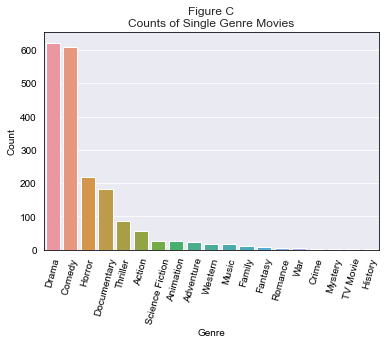

In [40]:
# Graphing a boxplot of each genre and its count 
bp = sns.barplot(x='genre', y='count', data=sub_df)
bp.set_title('Figure C\nCounts of Single Genre Movies')
bp.set_xlabel('Genre', fontsize=10)
bp.set_xticklabels(sub_df['genre'], rotation=75)
bp.set_ylabel('Count', fontsize=10);

> **Histograms** (bar plots) are quite uselful when dealing with a large number of observations that are measured on an interval scale.
> 
> By counting all instances of each genre, a histogram was graphed to visualize their distribution. Both *'Drama'* and *'Comedy'* genres are **more** common than other genres.

## Question 4
What are the most popular **single** genres?

In [41]:
# Adding two columns in our dummy dataframe to store the average/adjusted popularity of each genre
sub_df = sub_df.merge(sg_df.groupby('genre').mean()['popularity'].reset_index())
sub_df['popularity_adj'] = sub_df['count'] * sub_df['popularity']
sub_df

,genre,count,popularity,popularity_adj
0,Drama,622,0.543542,338.083352
1,Comedy,608,0.576173,350.313441
2,Horror,220,0.376747,82.884244
3,Documentary,182,0.218188,39.710241
4,Thriller,86,0.600147,51.612640
5,Action,57,0.630961,35.964776
6,Science Fiction,26,0.434728,11.302940
7,Animation,25,0.514222,12.855543
8,Adventure,22,0.649496,14.288903
9,Western,18,0.457101,8.227824


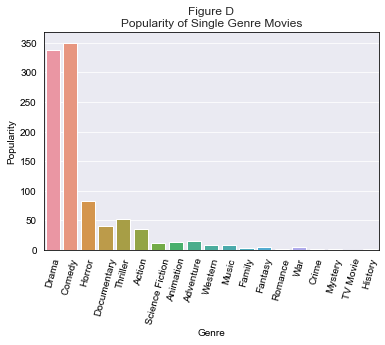

In [42]:
# Graphing a boxplot of each genre and its popularity 
bp = sns.barplot(x='genre', y='popularity_adj', data=sub_df)
bp.set_title('Figure D\nPopularity of Single Genre Movies')
bp.set_xlabel('Genre', fontsize=10)
bp.set_xticklabels(sub_df['genre'], rotation=75)
bp.set_ylabel('Popularity', fontsize=10);

> After grouping all our dataset by genre, an adjusted value of average popularity was mathmaticaly calculated for each genre.
> 
> *'Comedy'* and *'Drama'* genres are once again **more** superior than any other genre.